In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
X_valid=X_train_full[:5000]/255.0
X_train=X_train_full[5000:]/255.0
X_test=X_test/255.0
y_valid=y_train_full[:5000]
y_train=y_train_full[5000:]

In [200]:
from functools import partial

my_dense_layer=partial(tf.keras.layers.Dense,activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.0001))

model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    my_dense_layer(300),
    my_dense_layer(200),
    my_dense_layer(64),
    my_dense_layer(20),
    my_dense_layer(10,activation="softmax")
])

In [201]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
             metrics=["accuracy"])

In [202]:
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 14s 252us/sample - loss: 0.7115 - accuracy: 0.7880 - val_loss: 0.5183 - val_accuracy: 0.8488
Epoch 2/10
55000/55000 [==============================] - 14s 247us/sample - loss: 0.4949 - accuracy: 0.8517 - val_loss: 0.4753 - val_accuracy: 0.8624
Epoch 3/10
55000/55000 [==============================] - 12s 215us/sample - loss: 0.4526 - accuracy: 0.8666 - val_loss: 0.4644 - val_accuracy: 0.8646
Epoch 4/10
55000/55000 [==============================] - 12s 226us/sample - loss: 0.4275 - accuracy: 0.8740 - val_loss: 0.4328 - val_accuracy: 0.8746
Epoch 5/10
55000/55000 [==============================] - 12s 219us/sample - loss: 0.4059 - accuracy: 0.8809 - val_loss: 0.4067 - val_accuracy: 0.8840
Epoch 6/10
55000/55000 [==============================] - 12s 222us/sample - loss: 0.3905 - accuracy: 0.8843 - val_loss: 0.4071 - val_accuracy: 0.8838
Epoch 7/10
55000/55000 [=====================

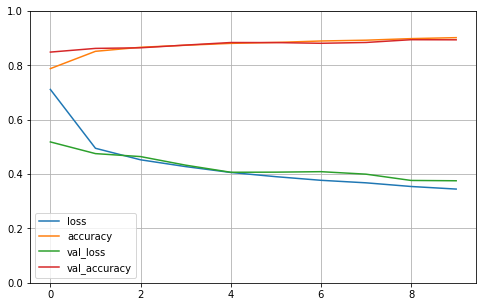

In [203]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

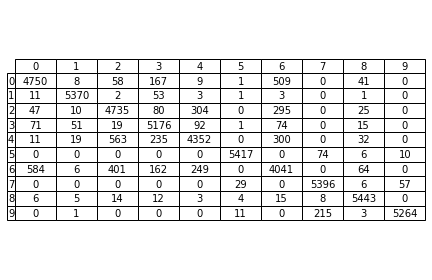

In [204]:
# create confusion matrix for the training data
y_pred=model.predict_classes(X_train)
conf_train=confusion_matrix(y_train,y_pred)

fig, ax = plt.subplots()

fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

df = pd.DataFrame(conf_train)
ax.table(cellText=df.values, rowLabels=np.arange(10), colLabels=np.arange(10), loc='center', cellLoc='center')
fig.tight_layout()

In [205]:
# accuracy on test data
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 2s 197us/sample - loss: 0.4125 - accuracy: 0.8798


[0.4125278217315674, 0.8798]

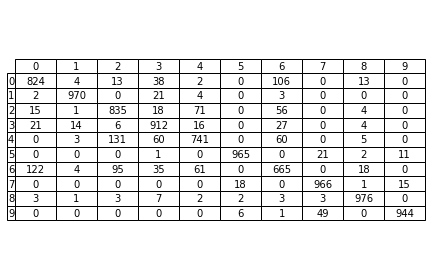

In [207]:
# create confusion matrix for the test data
y_pred=model.predict_classes(X_test)
conf_test=confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots()

fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

df = pd.DataFrame(conf_test)
ax.table(cellText=df.values, rowLabels=np.arange(10), colLabels=np.arange(10), loc='center', cellLoc='center')
fig.tight_layout()